---
## Setup for Visualization

In [1]:
import os
import json

import hashlib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
data_dir = "/home/ubuntu/notebooks/data/fruit_data"
out_dir = "/home/ubuntu/notebooks"
number = "26"

In [3]:
def data_to_colour(data):
    if isinstance(data, str):
        data = bytes(data, "utf-8")
    else:
        data = bytes(data)
    m = hashlib.sha256()
    m.update(data)
    key = int(m.hexdigest()[:8], 16)
    r = ((((key >> 0) & 0xFF) + 1) * 33) % 255
    g = ((((key >> 8) & 0xFF) + 1) * 33) % 255
    b = ((((key >> 16) & 0xFF) + 1) * 33) % 255

    inv_norm_i = 128 * (3.0 / (r + g + b))

    return (int(r * inv_norm_i) / 255, int(g * inv_norm_i) / 255, int(b * inv_norm_i) / 255)

The next helper function, `colorize_bbox_2d`, takes in the path to the RGB image for the background, the bounding box data, the labels, and the path to store the visualization. It outputs a colorized bounding box.

In [4]:
def colorize_bbox_2d(rgb_path, data, id_to_labels, file_path):
    rgb_img = Image.open(rgb_path)
    colors = [data_to_colour(bbox["semanticId"]) for bbox in data]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(rgb_img)
    
    for bbox_2d, color, index in zip(data, colors, range(len(data))):
        if str(index) in id_to_labels:
            labels = id_to_labels[str(index)]
            rect = patches.Rectangle(
                xy=(bbox_2d["x_min"], bbox_2d["y_min"]),
                width=bbox_2d["x_max"] - bbox_2d["x_min"],
                height=bbox_2d["y_max"] - bbox_2d["y_min"],
                edgecolor=color,
                linewidth=2,
                label=labels,
                fill=False,
            )
            ax.add_patch(rect)

    plt.legend(loc="upper left")
    plt.savefig(file_path)


---
##  Load Synthetic Data and Visualize

Now we are ready to use these helper functions. We first get our desired image.

In [5]:
rgb_path = data_dir
rgb = "rgb_"+number+".png" 
rgb_path = os.path.join(rgb_path, rgb)

In [6]:
npy_path = data_dir
bbox2d_tight_file_name = "bounding_box_2d_tight_"+number+".npy"
data = np.load(os.path.join(npy_path, bbox2d_tight_file_name))

In [7]:
json_path = data_dir
bbox2d_tight_labels_file_name = "bounding_box_2d_tight_labels_"+number+".json"
with open(os.path.join(json_path, bbox2d_tight_labels_file_name), "r") as json_data:
    bbox2d_tight_id_to_labels = json.load(json_data)

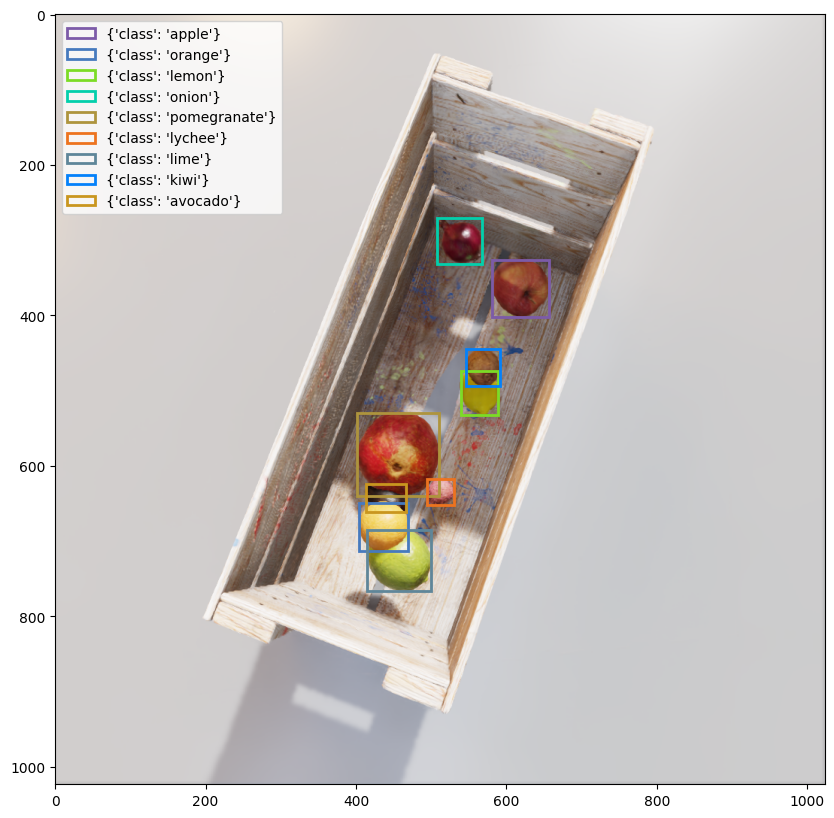

In [8]:
colorize_bbox_2d(rgb_path, data, bbox2d_tight_id_to_labels, os.path.join(out_dir, "bbox2d_tight.png"))